# Part #03: Model Salection

## Step #01: Selecting the Right Model(s)

### Set up the workspace

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
# Read the results from the previous section:
with open("./assets/preprocessing_results.pkl", mode="rb") as file_bin:
    resulst = pickle.load(file_bin)

In [3]:
# Unpack train and test sets:
feature_names, X_train, X_test, y_train, y_test = resulst.values()

### Find a good candidate(s) for the problem at hand

- Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
- Different estimators are better suited for different types of data and different problems.
- This **[flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)** is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data.

In [4]:
# Instantiate a dummy regressor for baseline comparison:
dummy_reg = DummyRegressor()

In [5]:
# Instantiate some candidate models:
linear_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor()
adaboost_tree_reg = AdaBoostRegressor(DecisionTreeRegressor())
random_forest_reg = RandomForestRegressor()
xgb_reg = XGBRegressor()

## Step #02: Selecting a Scoring Function(s)

In [6]:
# Define scoring function(s):
r2 = make_scorer(r2_score, greater_is_better=True)
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

## Step #03: Compare Different Models by Cross-Validation

- Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.
- A solution to this problem is a procedure called cross-validation (CV for short).

- Compare using R-squared:

Validating dummy_reg...
Validating dummy_reg done in 0.00 minutes!

Validating linear_reg...
Validating linear_reg done in 0.00 minutes!

Validating knn_reg...
Validating knn_reg done in 0.05 minutes!

Validating tree_reg...
Validating tree_reg done in 0.03 minutes!

Validating adaboost_tree_reg...
Validating adaboost_tree_reg done in 1.60 minutes!

Validating random_forest_reg...
Validating random_forest_reg done in 4.18 minutes!

Validating xgb_reg...
Validating xgb_reg done in 0.17 minutes!

                      min    mean     max
dummy_reg          -0.09%  -0.04%  -0.02%
linear_reg         59.12%  59.39%  59.91%
knn_reg            68.32%  69.20%  70.79%
tree_reg           64.98%  65.78%  66.84%
adaboost_tree_reg  80.29%  81.73%  83.62%
random_forest_reg  80.27%  81.77%  83.55%
xgb_reg            81.34%  82.80%  84.29%


CPU times: total: 6min 19s
Wall time: 6min 4s


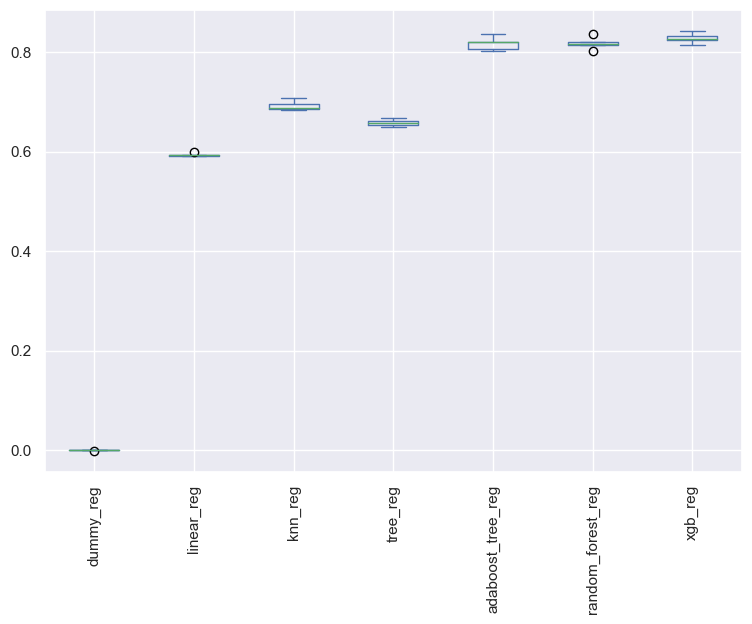

In [7]:
%%time
# Compare different models:
%run "./recipes/compare_models.py";
results = compare_models(
    X_train,
    y_train,
    r2,
    cv=5,
    dummy_reg=dummy_reg,
    linear_reg=linear_reg,
    knn_reg=knn_reg,
    tree_reg=tree_reg,
    adaboost_tree_reg=adaboost_tree_reg,
    random_forest_reg=random_forest_reg,
    xgb_reg=xgb_reg
);

- Compare using RMSE (results are correlated with R-squared but more interpretable):

Validating dummy_reg...
Validating dummy_reg done in 0.00 minutes!

Validating linear_reg...
Validating linear_reg done in 0.00 minutes!

Validating knn_reg...
Validating knn_reg done in 0.05 minutes!

Validating tree_reg...
Validating tree_reg done in 0.03 minutes!

Validating adaboost_tree_reg...
Validating adaboost_tree_reg done in 1.58 minutes!

Validating random_forest_reg...
Validating random_forest_reg done in 4.20 minutes!

Validating xgb_reg...
Validating xgb_reg done in 0.17 minutes!

                             min           mean            max
dummy_reg          -11747794.53%  -11548759.53%  -11399415.62%
linear_reg          -7503436.72%   -7358249.06%   -7261819.53%
knn_reg             -6611489.84%   -6407555.86%   -6228701.56%
tree_reg            -7000389.76%   -6779454.49%   -6623698.69%
adaboost_tree_reg   -5233214.48%   -4946232.60%   -4760378.11%
random_forest_reg   -5204694.29%   -4918385.37%   -4660594.37%
xgb_reg             -5073558.20%   -4787796.88%   -4567394.

<Figure size 640x480 with 0 Axes>

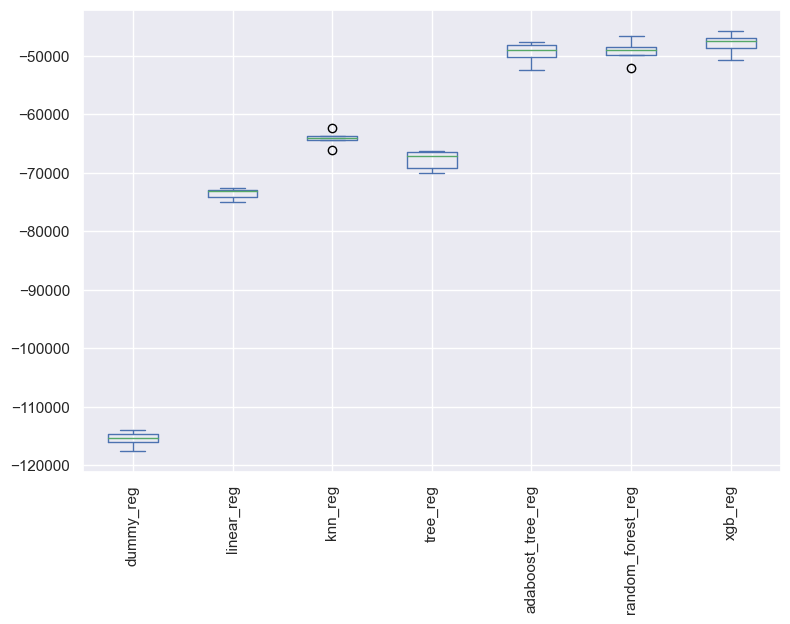

In [8]:
%%time
# Compare different models:
%run "./recipes/compare_models.py";
results = compare_models(
    X_train,
    y_train,
    rmse,
    cv=5,
    dummy_reg=dummy_reg,
    linear_reg=linear_reg,
    knn_reg=knn_reg,
    tree_reg=tree_reg,
    adaboost_tree_reg=adaboost_tree_reg,
    random_forest_reg=random_forest_reg,
    xgb_reg=xgb_reg
);

- It seems like there are three models that may suit this task:
> - `AdaboostRegressor`,
> - `RandomForestRegressor`,
> - `XGBRegressor`.
- The next step is to validate the selected model and tune its hyperparameters.